**Análise de Dados de anúncios de imóveis de São Paulo**
==============

![Teste](https://cdn.pixabay.com/photo/2016/02/11/23/03/sao-paulo-1194935_960_720.jpg)

Imagem de <a href="https://pixabay.com/pt/users/joelfotos-767874/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1194935">Joel santana Joelfotos</a> por <a href="https://pixabay.com/pt/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1194935">Pixabay</a>

# **Imersão Dados 04 - Alura**

**Autor:** *Leandro H. S. Yorinori*

Sumário



# 01. Introdução

## 01.01. A inspiração do projeto

Este projeto é inspirado na Imersão Dados 04 da [Alura](https://www.alura.com.br/), que ocorreu entre os dias 23 e 27 de maio de 2022. Durante a imersão foram disponibilizadas 05 aulas gratuitas com o intuito de dar os primeiros passos ou se aprofundar no universo da Ciência de Dados. As aulas trouxeram assuntos relevantes tanto para quem estava iniciando na área ou mesmo para pessoas com experiência em Ciência de Dados. Os temas abordados nas aulas foram os seguintes.

- Aula 01: Seu primeiro Colab com Python e Pandas;
- Aula 02: Tratamento de dados e primeiros gráficos;
- Aula 03: Gráficos, time series e análise exploratória;
- Aula 04: Missão impossível: Cruzando bases de dados;
- aula 05: Machine Learning

Ao final de cada aula foram propostos desafios para buscar um melhor entendimento sobre o que aconteceu na aula e para achar pistas sobre os próximos passos a serem dados durante a análise.

O tema escolhido na imersão Dados 4 da [Alura](https://www.alura.com.br/) estava relacionado ao Mercado Imobiliário. A principal base de dados fornecida durante a imersão está relacionada com dados de anúncios de imóveis da cidade de São Paulo.

## 01.02. O Problema a ser resolvido 

O objetivo deste projeto é criar um **modelo de regressão** para **predição** do Valor de anúncio de um imóvel baseado em algumas de suas características. Este modelo será construído utilizando técnicas de **Machine Learning** sobre uma Base de Dados construída através de diversos procedimentos de limpeza e tratamento de dados. Para uma análise mais aprofundada, diferentes bases de dados foram relacionadas para aumentar a complexidade do modelo.  

# 02. Análise Exploratória dos Dados

Segundo a [Escola de Dados](https://escoladedados.org/), "o objetivo da Análise Exploratória de Dados (AED) é utilizar síntese estatística e técnicas de visualização para entender melhor os dados e identificar insights sobre tendências e a qualidade dos dados, bem como para formular hipóteses e fazer suposições nas análises. Análise exploratória de dados NÃO SE TRATA de elaborar visualizações sofisticadas ou mesmo esteticamente agradáveis. O objetivo é fazer testes e encontrar respostas com os dados. [[1]](https://escoladedados.org/tutoriais/analise-exploratoria-de-dados/)".

## 02.01. Bibliotecas utilizadas

### Principais bibliotecas utilizadas

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Instalação e importação de bibliotecas menos usuais

In [38]:
#!pip install shapely
#!pip install geopandas

from shapely.geometry import Point
import geopandas as gpd

Configurando algumas opções das bibliotecas importadas

In [39]:
# 2 casas decimais de precisão
pd.set_option("display.precision", 2)

# formatação expandida com 2 casas decimais de precisão
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# configuração do seaborn
sns.set()

# Suprimir o SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

## 02.02. Leitura dos dados 

Todas as bases de dados utilizadas neste projeto foram disponibilizadas pela própria Alura. Para começar, apenas a Base de dados principal será importada (Dados de anúncio de imóveis de São Paulo), sobre a qual será realizada a Análise Exploratória de Dados. A importação será feita através do link direto dos dados no [GitHub]("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv").

(Há a ressalva de que outras bases de dados serão importadas futuramente para o cruzamento de dados pertinentes. Estas serão importadas ao longo do Notebook, conforme a necessidade.)

In [40]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

# Leitura do arquivo csv
df_raw = pd.read_csv(url)

In [41]:
# Visualização do cabeçalho do DataFrame
df_raw.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## 02.03 Exploração, Tratamento e Limpeza de dados

### Tratamento de dados nulos e de tipagem de dados

Uma primeira investigação que pode ser feita é sobre o tipo dos dados e a quantidade de dados não nulos por coluna do DataFrame. O método `info()` nos fornece isto

In [42]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Nota-se que as colunas Rua e Bairro apresentam dados nulos. Além disto, a coluna 'Valor' apresenta o tipo objeto. O esperado seria que o tipo fosse de espécie numérica. Isto indica que provavelmente será necessário aplicar algum tipo de tratamento nesta coluna 'Valor' para transformá-la em um tipo numérico.

Ao buscar um elemento da coluna 'Valor' vemos que ele aparenta ser uma string.

In [43]:
df_raw["Valor"][0]

'R$ 7.000.000'

Podemos confirmar sua tipagem utilizando o comando `type`

In [44]:
type(df_raw["Valor"][0])

str

E como esperado, a variável é do tipo string. 

Podemos utilizar o método `split` para separar o R$ do 'número' e o argumento `expand=True` para criar um data frame das com as divisões realizadas pelo método `split`.

In [45]:
df_raw["Valor"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Deve-se investigar cada uma das colunas geradas.

In [46]:
df_raw["Valor"].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [47]:
df_raw["Valor"].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [48]:
df_raw["Valor"].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

- A primeira coluna apresenta somente o símbolo da moeda;
- A segunda coluna parece conter apenas as strings de 'números' que devem ser convertidas;
- Aparentemente, os dados da terceira coluna que apresentam as qualidades '/Mês', '/Ano' e '/Dia' estão relacionados com imóveis disponíveis para serem alugados. Por hora estes imóveis não nos interessam e podem ser removidos da base de dados.

Neste momento é conveniente criar um DataFrame que contemple a coluna valor expandida.

In [49]:
# Faz uma cópia do DataFrame original
df_expandido = df_raw

# Cria três novas colunas que armazenam o split da coluna Valor
df_expandido[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = df_expandido["Valor"].str.split(expand=True)
df_expandido.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None


In [50]:
# Filtra o DataFrame, removendo os dados de aluguéis (dados que tem tipo anúncio = '/Mês', '/Ano' e '/Dia')
dados_vendas = df_expandido[df_expandido["Tipo_anuncio"].isnull()]
dados_vendas.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None


In [51]:
# Sobrescrevendo a coluna Valor com os valores tratados e transformados para float 
# Remoção dos caracteres de pontos dos dados da coluna Valor_anuncio e conversão do tipo para float 
dados_vendas["Valor"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

Novamente, pode-se utilizar o método `info()` para extrair informações do Dataset atual.

In [52]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   float64
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   object 
 10  Tipo_anuncio   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


Note que a coluna Tipo_anuncio só contém valores vazios. Neste momento é conveniente a remoção desta coluna e também das colunas associadas à Valor que ainda são do tipo string. 

In [53]:
# Removendo colunas que já foram tratadas
dados_vendas.drop(columns=['Moeda', 'Valor_anuncio', 'Tipo_anuncio'], inplace=True)

dados_vendas.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00


Está completa a conversão do tipo da coluna Valor para tipo float.

## Visualização dos Dados numéricos 

In [54]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


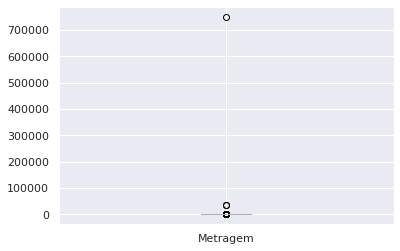

In [55]:
dados_vendas[['Metragem']].boxplot()

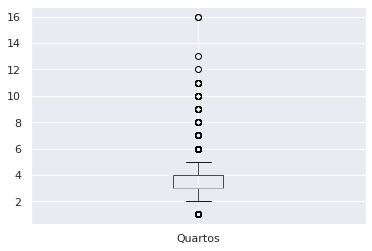

In [56]:
dados_vendas[['Quartos']].boxplot()

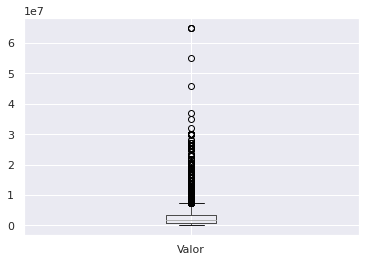

In [57]:
dados_vendas[['Valor']].boxplot()

Ao observar o Boxplot de algumas variáveis, fica claro que existem outliers que devem ser removidos. Os outliers são dados que se diferenciam drasticamente de todos os outros no conjunto de dados e que podem comprometer a análise e, portanto devem ser removidos.

## Remoção de Outliers: Método "Interquartile Range (IQR)" 

In [58]:
# Seleção das colunas alvo
cols = ["Valor"] 

# Cálculo dos percentis e IQR
Q1 = dados_vendas[cols].quantile(0.25)
Q3 = dados_vendas[cols].quantile(0.75)
IQR = Q3 - Q1

# Remoção dos Outliers através do método IQR
dados_vendas_IQR = dados_vendas[~((dados_vendas[cols] < (Q1 - 1.5 * IQR)) |(dados_vendas[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

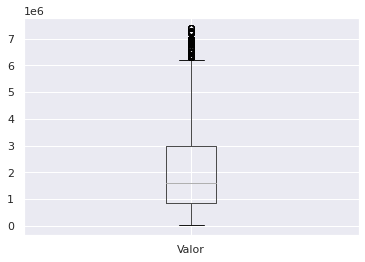

In [59]:
# Boxplot após remoção dos Outliers
dados_vendas_IQR[['Valor']].boxplot()

## Outras formas de visualizações dos dados

In [60]:
# Criando nova coluna com valor parametrizado da coluna Valor. Divisão por 1 milhão
dados_vendas_IQR["Valor_por_M"] = dados_vendas_IQR["Valor"] / 1000000

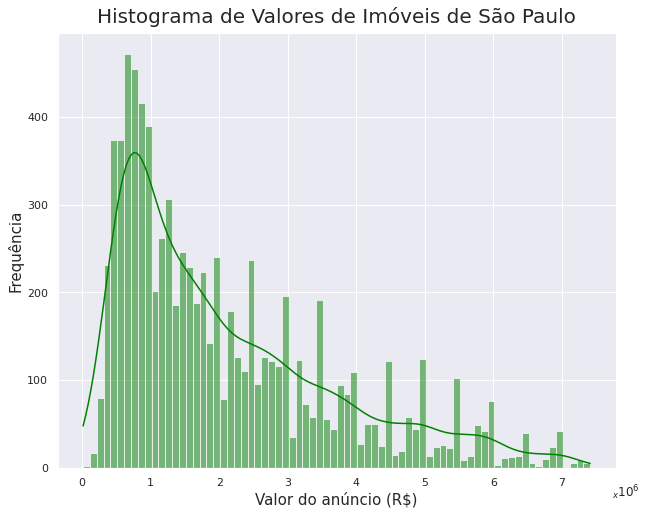

In [61]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas_IQR,
                  x = "Valor_por_M",
                  binwidth = 0.1,
                  kde = True,
                  color = 'green')
ax.set_title(r"Histograma de Valores de Imóveis de São Paulo", fontsize=20, pad=10)
ax.set_ylabel(r'Frequência', fontsize=15)
ax.set_xlabel(r"Valor do anúncio (R\$)", fontsize=15)

ax.annotate(r'$_{x}10^6$', xy=(0.92, 0.05), xycoords='figure fraction')

plt.show()

O Histograma de Valores de imóveis de São Paulo é enviesado à direita, indicando que os valores altos ocorrem com baixa frequência. Este tipo de histograma geralmente representa fenômenos identificados na economia [[Ref]](https://pt.wikipedia.org/wiki/Histograma), como é o caso dos Valores de imóveis de São Paulo aqui estudados. 

### Análise do preço por metro quadrado dos imóveis de São Paulo

Podem existir diversas abordagens para o cálculo do preço por metro quadrado. Aqui será adotado o cálculo através da divisão do Valor do imóvel por sua Metragem.

$$ Preço/m^2 = \frac{Valor}{Metragem}$$

A seguir é criado uma coluna 'preco_m2' para armazenar os valores calculados dos preços por metro quadrado para cada item do dataset.

In [64]:
# Criando uma nova coluna com o preço por metro quadrado
dados_vendas_IQR["preco_m2"] = dados_vendas_IQR["Valor"] / dados_vendas_IQR["Metragem"]
dados_vendas_IQR.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68


Pode-se investigar o comportamento dos dados de preço por metro quadrado através de um Boxplot.

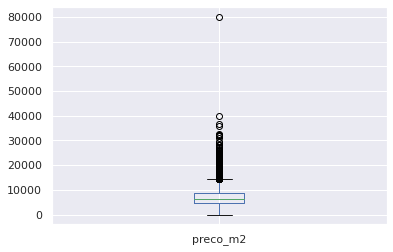

In [67]:
dados_vendas_IQR["preco_m2"].plot.box()

Claramente nota-se um valor anômalo quando os dados de preço por metro quadrado são analisados. Não houve tal clareza quando analisados apenas os dados de Valores. Isto reforça a importância de explorar a base de dados e criar novas variáveis que façam sentido para a análise.

Pode-se remover este dado anômalo pontual. O precedimento para isto é realizado a seguir.

In [80]:
# Armazenando o índice do maior valor de preco_m2
tmp_index = dados_vendas_IQR["preco_m2"].sort_values(ascending=False).index[0]

# Removendo a linha que possui
dados_vendas_IQR.drop(tmp_index, inplace=True)


In [84]:
# Agrupando os dados por bairro
agrupado = dados_vendas_IQR.groupby("Bairro")
agrupado.mean().head(2)

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_por_M,preco_m2
Bairro,,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57


In [93]:
# Selecionando a variável a ser plotada:
#   média de preços por metro quadrado por bairro
var2plot = agrupado.mean()['preco_m2']

Uma forma interessante de visualizar estes dados é através de um gráfico de barra. Porém, como a quantidade de bairros é muito grande, para que o gráfico possa ser legível, deve-se limitar a apresentação dos dados para um número reduzido. A seguir são mostrados os 20 bairros com os maiores médias de preços por metro quadrado de São Paulo.

Text(0.5, 0, 'Bairro')

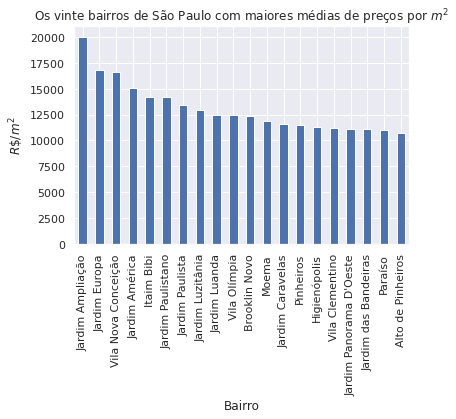

In [90]:
ax = var2plot.sort_values(ascending=False).head(20).plot(kind='bar')
ax.set_title(
    r"Os vinte bairros de São Paulo com maiores médias de preços por $m^2$")
ax.set_ylabel(r"$R\$/m^2$")
ax.set_xlabel(r"Bairro")

O gráfico mostra que o bairro Jardim Ampliação apresenta a maior média de preço por metro quadrado. Além disto, o gráfico contempla diversos bairros nobres de São Paulo (como Jardim Europa, Jardim e Paulista e Moema), como é esperado. 

Text(0.5, 0, 'Bairro')

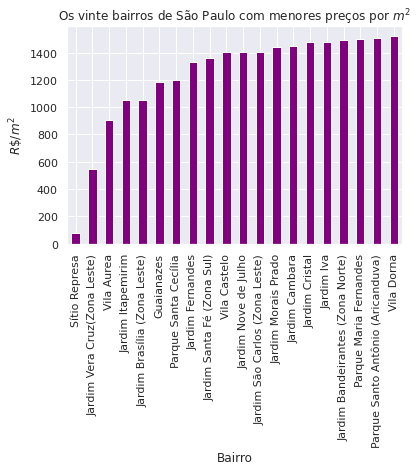

In [89]:
ax = var2plot.sort_values(ascending=True).head(20).plot(kind='bar', color='purple')
ax.set_title(
    r"Os vinte bairros de São Paulo com menores médias de preços por $m^2$")
ax.set_ylabel(r"$R\$/m^2$")         
ax.set_xlabel(r"Bairro") 

Quando apresentados os vinte bairros com menores médias de preços por metro quadrado, nota-se que o Bairro Sitio Represa apresenta um valor muito abaixo em relação aos demais bairros e portanto pode ser um motivo para uma investigação na base de dados.

In [91]:
dados_vendas_IQR.set_index("Bairro").loc["Sítio Represa"]

Rua            Rua Benedito Felizardo
Cidade                      São Paulo
Metragem                        37000
Quartos                             4
Banheiros                           2
Vagas                               4
Valor                      2900000.00
Valor_por_M                      2.90
preco_m2                        78.38
Name: Sítio Represa, dtype: object

In [92]:
dados_vendas_IQR.set_index("Bairro").loc["Sítio Represa"]

Index(['Rua', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor',
       'Valor_por_M', 'preco_m2'],
      dtype='object')

# 02.03. Relacionando outras Bases de Dados

### Base de dados do IBGE (Renda)

### Base de dados de endereços

### Base de dados para o geopandas (dimensões do polígono)

## -Dataset "final"

# 03. Objetivo do Projeto

# 04. Machine Learning: problema de regressão

## Objetivo

## Construção do Baseline

## Redução de Dimensionalidade

## Seleção de modelo

# 05. Conclusões

# 06. Referência Bibliográficas

# 07. Agradecimentos

# 08. Sobre mim